In [51]:
from qonnx.core.modelwrapper import ModelWrapper
import numpy as np
import matplotlib.pyplot as plt

In [122]:
qonnx_model_path = ["/mnt/data0/dittmeier/data/gnn4itk/CF_reference_weighting/onnx_exports/best-v57/pruning_149_clean.onnx",    # this is pytorch reference model
                    "/mnt/data0/dittmeier/data/gnn4itk/CF_reference_weighting/onnx_exports/best-v93/pruning_149_clean.onnx",    # this is QAT 
                    "/mnt/data0/dittmeier/data/gnn4itk/CF_reference_weighting/onnx_exports/best-v96/pruning_149_clean.onnx",    # this is L1 
                    "/mnt/data0/dittmeier/data/pruning_1041_clean.onnx"]  # this is pruned model
parameter_to_fetch = ["Gemm_1_param0",
                      "Quant_3_param0",
                      "Quant_3_param0",
                      "Quant_3_param0"]
bins = [164, 164, 164, 164] # first to 16 for quantized
titles = ["PyTorch reference model", "Quantization Aware Training (QAT)", "QAT + L1 Regularisation", "QAT + L1 Regularisation + Pruning"]

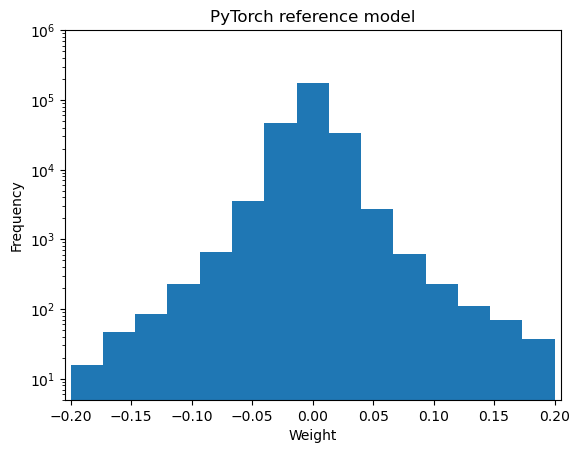

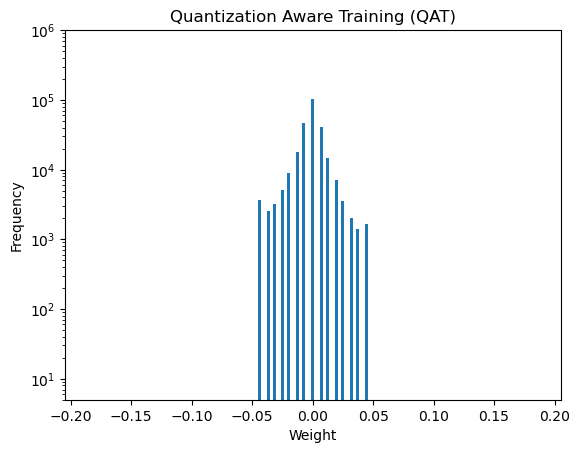

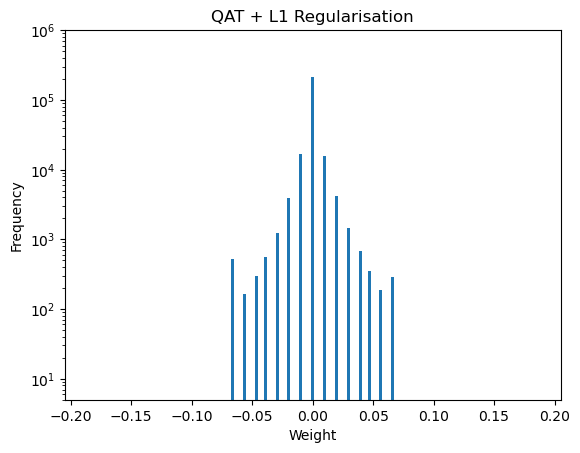

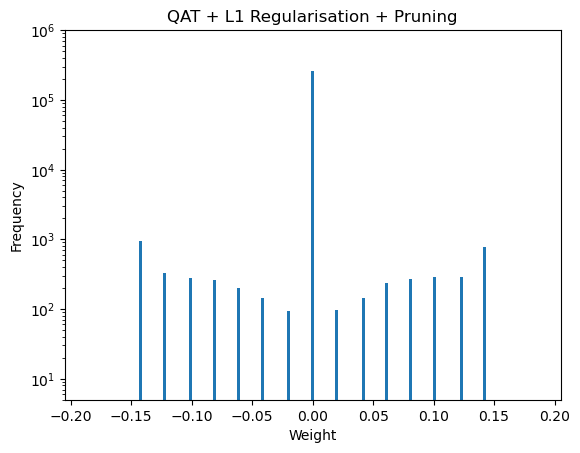

In [123]:
for model_path, param, bin, title in zip (qonnx_model_path, parameter_to_fetch, bins, titles):
    model = ModelWrapper(model_path)
    weights = model.get_initializer(param)
    flattened_weights = np.ravel(weights)
    bin_array = np.linspace(-0.2, 0.2, bin)
    plt.hist(flattened_weights, bins=bin_array)  # Adjust the number of bins here
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.ylim(5,1e6)
    plt.xlim(-0.205, 0.205)
    plt.title(title)
    plt.savefig(title + ".png")
    plt.show()


In [104]:
for model_path, param in zip (qonnx_model_path, parameter_to_fetch):
    model = ModelWrapper(model_path)
    weights = model.get_initializer(param)
    flattened_weights = np.ravel(weights)
    print("non-zero elements: ", np.count_nonzero(flattened_weights))

non-zero elements:  262144
non-zero elements:  159011
non-zero elements:  45994
non-zero elements:  4355
